In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
import shutil
from datetime import datetime
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

In [3]:
df = pd.read_csv('/content/diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
df.shape

(768, 9)

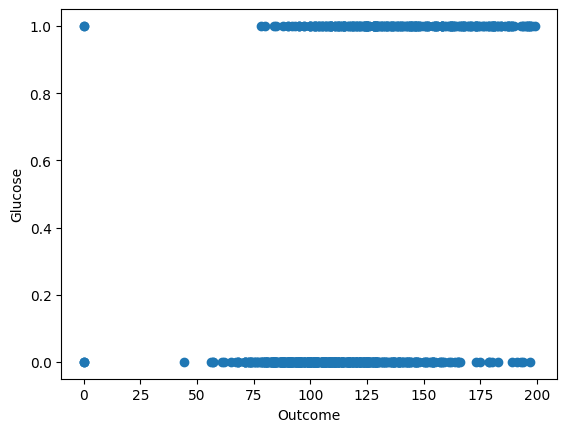

In [9]:
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

In [10]:
medical_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in medical_columns:
    df[col] = df[col].replace(0, np.nan)

for col in medical_columns:
    df[col].fillna(df[col].median(), inplace=True)

In [11]:
df.isnull().sum().sum()

np.int64(0)

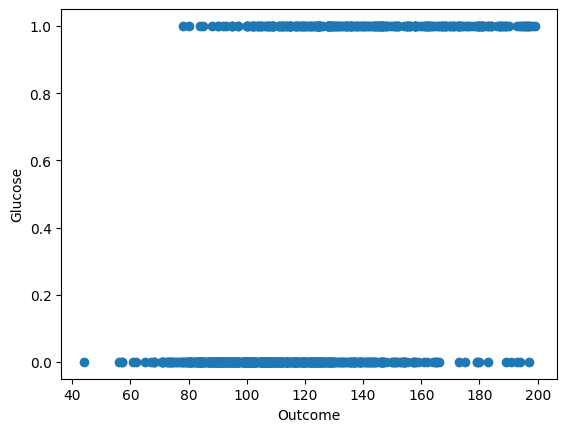

In [12]:
plt.scatter(df['Glucose'], df['Outcome'])
plt.xlabel('Outcome')
plt.ylabel('Glucose')
plt.show()

In [13]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.081770,0.025047,0.021559,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.192615,0.419451,0.231049,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.191892,0.045363,0.281257,-0.002378,0.324915,0.165723
SkinThickness,0.081770,0.192615,0.191892,1.000000,0.155610,0.543205,0.102188,0.126107,0.214873
Insulin,0.025047,0.419451,0.045363,0.155610,1.000000,0.180241,0.126503,0.097101,0.203790
BMI,0.021559,0.231049,0.281257,0.543205,0.180241,1.000000,0.153438,0.025597,0.312038
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.102188,0.126503,0.153438,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.126107,0.097101,0.025597,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.214873,0.203790,0.312038,0.173844,0.238356,1.000000


<Axes: >

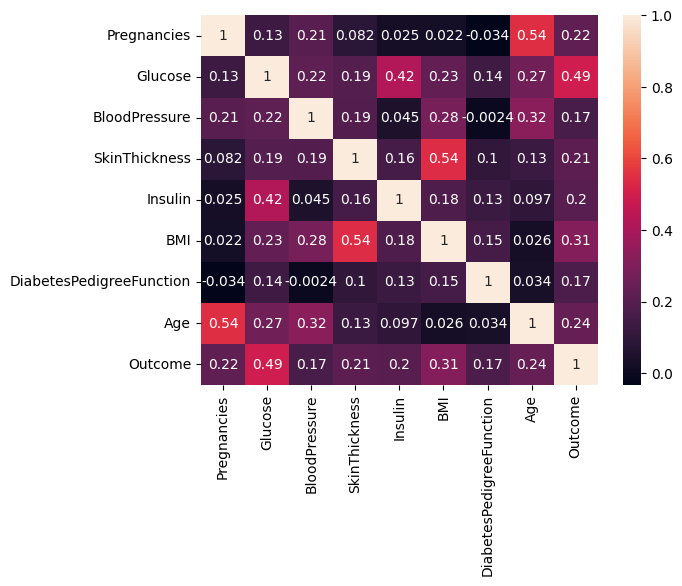

In [14]:
sns.heatmap(corr , annot = True)

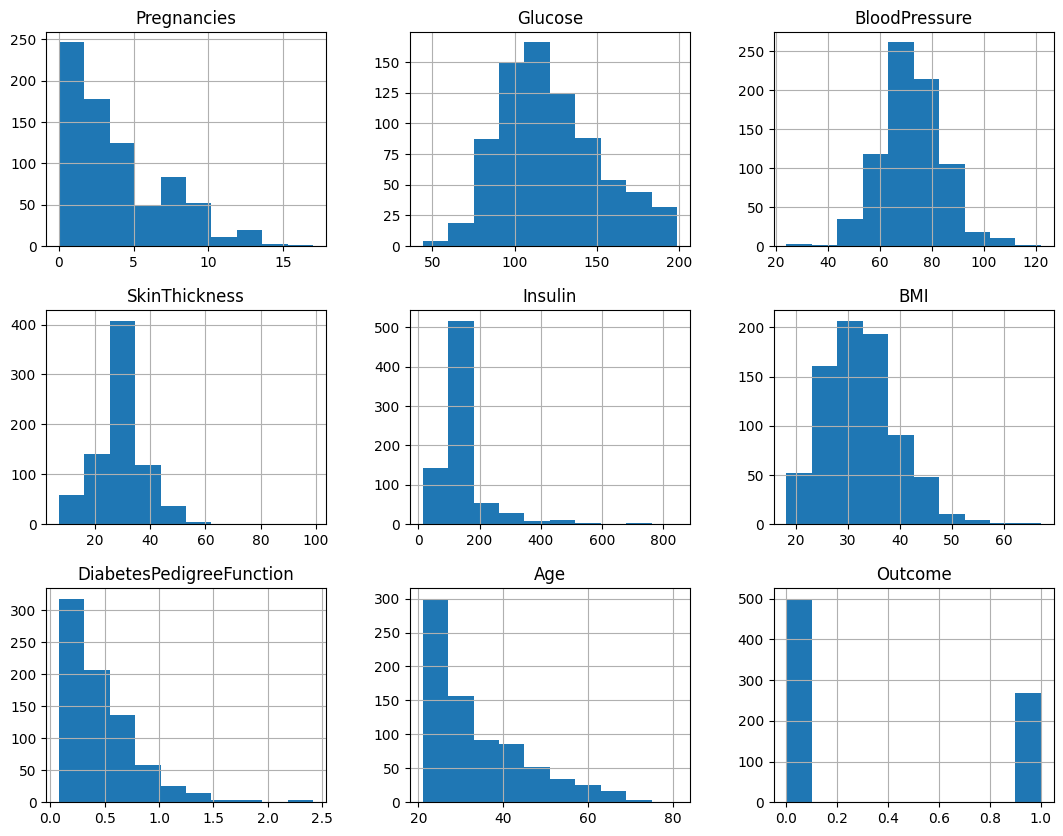

In [15]:
df.hist(figsize = (13, 10))
plt.show()

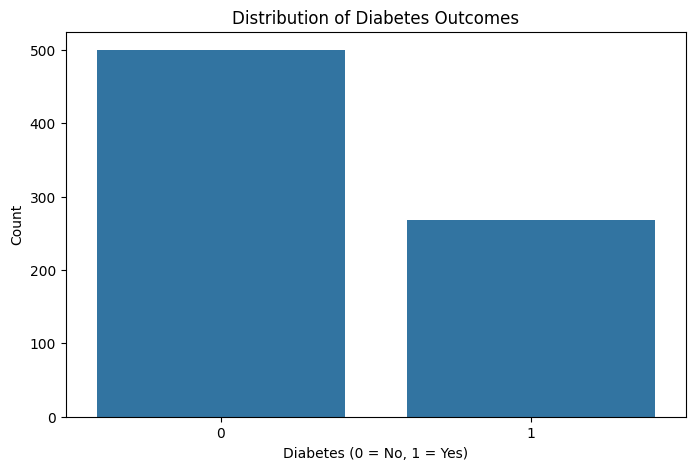

In [16]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcomes')
plt.xlabel('Diabetes (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [17]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [19]:
X_train.shape

(614, 8)

In [20]:
X_test.shape

(154, 8)

In [23]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ("model", DecisionTreeClassifier())
])

In [24]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', DecisionTreeClassifier())])

In [25]:
y_pred = pipeline.predict(X_test)

In [26]:
accuracy_score(y_test, y_pred)

0.6818181818181818

In [27]:
confusion_matrix(y_test, y_pred)

array([[79, 21],
       [28, 26]])

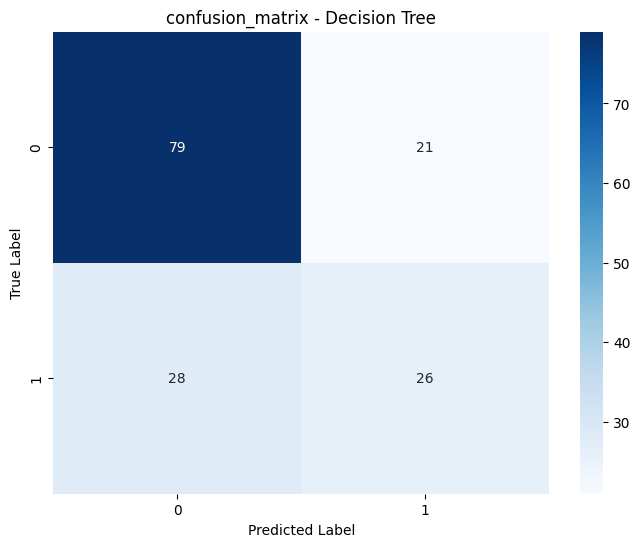

In [28]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [29]:
dfy = pd.DataFrame({
    'y_test' : y_test ,
    'y_pred' : y_pred,
    'diff between y_pred and y_test' : abs(y_pred-y_test)
})
dfy

,y_test,y_pred,diff between y_pred and y_test
44,0,1,1
672,0,0,0
700,0,0,0
630,1,1,0
81,0,1,1
...,...,...,...
32,0,0,0
637,0,0,0
593,0,0,0
425,1,1,0


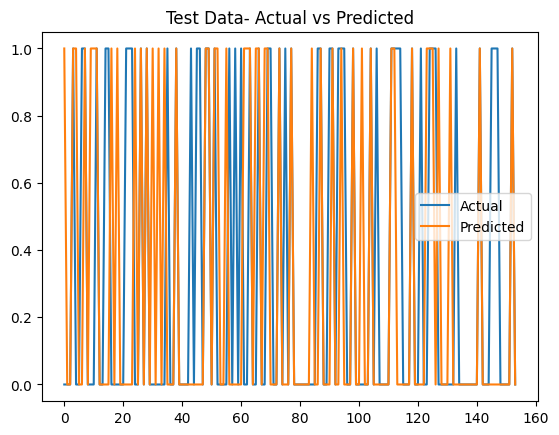

In [30]:
plt.plot(np.array(y_test))
plt.plot(np.array(y_pred))
plt.title('Test Data- Actual vs Predicted')
plt.legend(['Actual','Predicted'])

In [31]:
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [32]:
mae

0.3181818181818182

In [33]:
rmse

0.3181818181818182

In [34]:
r2

-0.39740740740740743

In [38]:
BUNDLE_DIR = "/content"
os.makedirs(BUNDLE_DIR, exist_ok=True)

MODEL_PATH = os.path.join(BUNDLE_DIR, "decision_tree.joblib")
MODEL_PATH

'/content/decision_tree.joblib'

In [39]:
joblib.dump(pipeline, MODEL_PATH)

['/content/decision_tree.joblib']

In [40]:
zip_path = shutil.make_archive("/content", "zip", BUNDLE_DIR)
print("✅ Bundle zipped:", zip_path)

✅ Bundle zipped: /content.zip


In [ ]:
from google.colab import drive
drive.mount('/content/drive')